In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cd ~/HPT_500k/HPT_LS05_DOM30_TI5/

/mnt/drive2/re_500k/HPT_LS05_DOM30_TI5


In [78]:
ds=[]
for ib in range(4):
    ifile=open('debug_tang_%i.dat'%(ib+1))
    temp=ifile.readline().split()
    nx=int(temp[0])
    ny=int(temp[1])
    data=np.empty([4,ny,nx])
    for j in range(ny):
        for i in range(nx):
            temp=ifile.readline().split()
            for k in range(4):
                data[k,j,i]=float(temp[k])
    ifile.close()
    ds.append(data)

In [79]:
ifile=open('fort.151','r')
npts=int(ifile.readline())
print npts
blade_coord=np.empty([2,npts])
for j in range(npts):
    temp=ifile.readline().split()
    blade_coord[0,j]=float(temp[0])
    blade_coord[1,j]=float(temp[1])
ifile.close()

1949


<IPython.core.display.Javascript object>


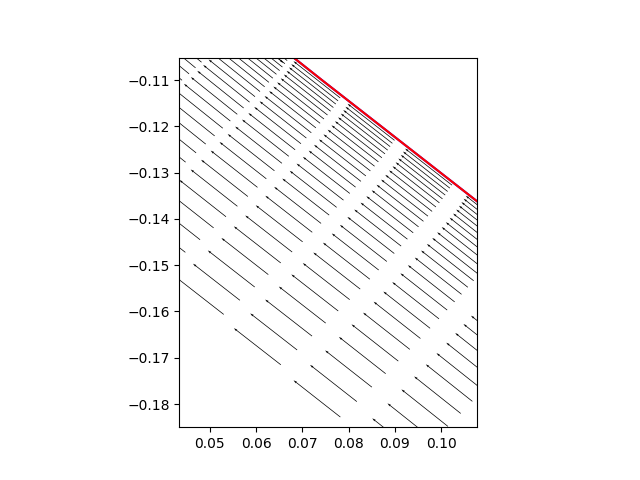

In [80]:
skip=5
plt.figure()
plt.axes(aspect=1.)
for ib in range(4):
    data=ds[ib]
    plt.plot(data[0,:,-1],data[1,:,-1],'b')
    plt.quiver(data[0,::5,::5],data[1,::5,::5],data[2,::5,::5],data[3,::5,::5],scale=5.)
plt.plot(ds[0][0,159,79],ds[0][1,159,79],'x')
plt.plot(blade_coord[0,:],blade_coord[1,:],'r')

In [85]:
for ib in range(4):
    data=ds[ib]
    leng=np.sqrt(data[2,:,:]**2+data[3,:,:]**2)
    print leng.max()

1.0
1.0
1.0
1.0


<IPython.core.display.Javascript object>


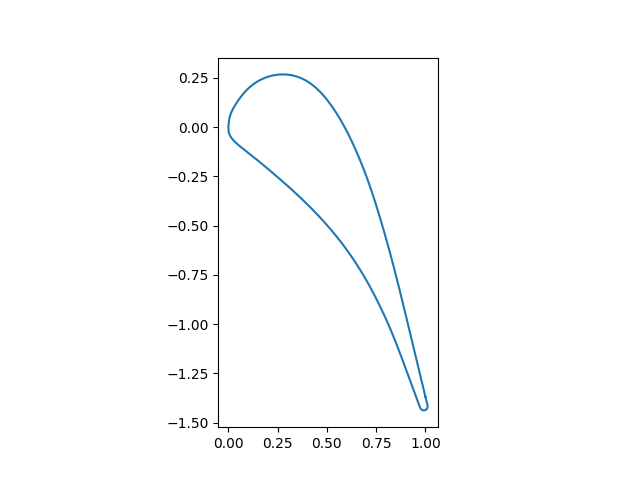

In [48]:
plt.figure()
plt.axes(aspect=1.)
ibeg=0
iend=-1
plt.plot(blade_coord[0,ibeg:iend],blade_coord[1,ibeg:iend])

In [49]:
print blade_coord[0,-10:]

[ 0.99722379  0.99752671  0.9978295   0.99813306  0.99843723  0.99874318
  0.99905121  0.99936265  0.99967808  1.        ]


In [81]:
for j in range(npts-1):
    if (blade_coord[0,j]==blade_coord[0,j+1]):
        print j

In [51]:
print blade_coord[:,-1]
print blade_coord[:,0]

[ 1.         -1.36860967]
[ 1.         -1.36860967]


<IPython.core.display.Javascript object>


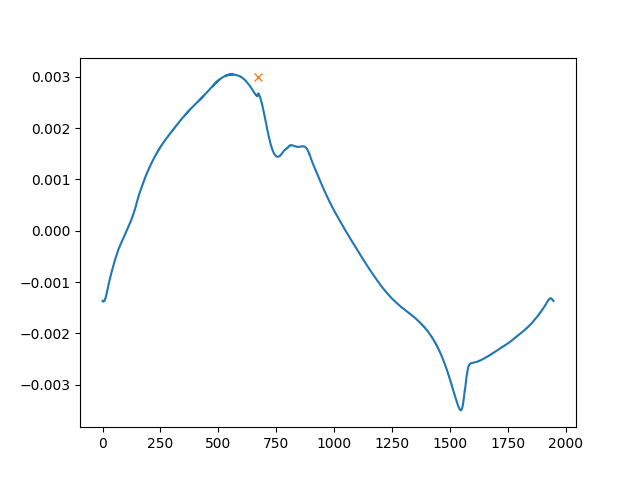

In [55]:
plt.figure()
plt.plot(np.diff(blade_coord[1,:]))
plt.plot(670,0.003,'x')

In [67]:
def inter_sect(x0,x1,x2):
    del_t=x1[:]-x0[:]
    leng=del_t[0]**2+del_t[1]**2
    temp1=(x2[0]-x0[0])
    temp2=(x2[1]-x0[1])
    a=(temp1*del_t[0]+temp2*del_t[1])/leng
    b=(temp1*del_t[1]-temp2*del_t[0])/leng
    dist=np.sqrt((b*del_t[0])**2+(del_t[1]*b)**2)
    xc=np.array([x0[0]+del_t[0]*a,x0[1]+del_t[1]*a])
    xc1=np.array([x2[0]-del_t[1]*b,x2[1]+del_t[0]*b])
    return a,b,dist,xc,xc1

<IPython.core.display.Javascript object>


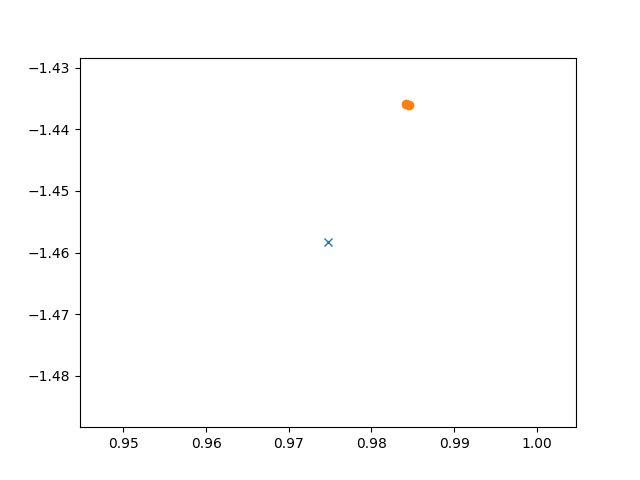

-0.502898072717
1.7389340045


(-1.488353877067566, -1.428353877067566)

In [74]:
plt.figure()
x1=0.97474122047424316
y1=-1.4583538770675659
plt.plot(x1,y1,'x')
a1_old=0.
for j in range(npts-1):
    a1,b1,d1,x_c,x_c1=inter_sect(blade_coord[:,j],blade_coord[:,j+1],([x1,y1]))
    if a1<=1. and a1>=0.:
        print a1,b1
    if (a1_old>0. and a1< 0.) or (a1_old<0. and a1> 0.):
        print a1
        plt.plot(blade_coord[0,j:j+2],blade_coord[1,j:j+2],'o-')
    a1_old=a1
plt.xlim([x1-0.03,x1+0.03])
plt.ylim([y1-0.03,y1+0.03])